In [108]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [109]:
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import mpl_toolkits
#from mpl_toolkits.basemap import Basemap
import pandas as pd
import xarray as xr
import Nio
print (Nio.__version__)
import seaborn as seabornInstance 
import sklearn

print("python version:")
import platform
print(platform.python_version())

1.5.5
python version:
3.7.3


# Load Data

In [110]:
dat = xr.open_dataset('/global/scratch/medhap02/ERA5_MSLP_SST_Td_tas_Jan1979toMay2020.grib',engine='pynio')

sst = dat['SSTK_GDS0_SFC_S123']
sst = sst.rename({'g0_lon_2':'lon', 'g0_lat_1':'lat', 'initial_time0_hours':'time'})

slp = dat['MSL_GDS0_SFC_S123']
slp = slp.rename({'g0_lon_2':'lon', 'g0_lat_1':'lat', 'initial_time0_hours':'time'})

print(sst)
print(slp)

<xarray.DataArray 'SSTK_GDS0_SFC_S123' (time: 497, lat: 721, lon: 1440)>
[516005280 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-05-01
  * lat      (lat) float32 90.0 89.75 89.5 89.25 ... -89.25 -89.5 -89.75 -90.0
  * lon      (lon) float32 0.0 0.25 0.5 0.75 1.0 ... 359.0 359.25 359.5 359.75
Attributes:
    center:                          European Center for Medium-Range Weather...
    long_name:                       Sea surface temperature
    units:                           K
    level_indicator:                 [1]
    gds_grid_type:                   [0]
    parameter_table_version:         [128]
    parameter_number:                [34]
    forecast_time:                   [0]
    forecast_time_units:             hours
    statistical_process_descriptor:  average of N uninitialized analyses
    statistical_process_duration:    instantaneous (beginning at reference ti...
    N:                               [744 672 74

In [112]:
precipdat = xr.open_dataset('pALLIN.nc', decode_times=False)
print(precipdat)
time = pd.date_range('1874-05-01', freq='M', periods=1752)
precipALLIN = xr.Dataset({'data': ('data', precipdat['precip']), 'time': time, 'foo': ('int', np.arange(1752))})
precipALLIN

<xarray.Dataset>
Dimensions:  (time: 1752)
Coordinates:
  * time     (time) float32 0.0 1.0 2.0 3.0 4.0 ... 1748.0 1749.0 1750.0 1751.0
Data variables:
    precip   (time) float32 ...
Attributes:
    title:        
    description:  All-India Rainfall
    scripturl01:  https://climexp.knmi.nl/getindices.cgi?STATION=All-India_Ra...
    comment:      
    institution:  KNMI Climate Explorer
    scripturl02:  https://climexp.knmi.nl/dat2nc.cgi?id=$id&station=All-India...
    history:       2020-04-02  2:43:20 bin/dat2nc data/pALLIN.dat p All-India...
    Conventions:  CF-1.0


<xarray.Dataset>
Dimensions:  (data: 1752, int: 1752, time: 1752)
Coordinates:
  * data     (data) float32 19.6 10.7 14.5 33.9 63.6 ... 168.7 52.1 8.0 7.0
  * time     (time) datetime64[ns] 1874-05-31 1874-06-30 ... 2020-04-30
Dimensions without coordinates: int
Data variables:
    foo      (int) int64 0 1 2 3 4 5 6 7 ... 1745 1746 1747 1748 1749 1750 1751

# EPT

In [131]:
#EP-ENSOpredictor

#DSST1
latrange1 = sst.sel(lat = slice(5, -20)).lat
weights1 = np.cos(latrange1*np.pi/180)

marchdata1 = sst.sel(lat = slice(5, -20), lon = slice(150, 170), time = (sst['time.month']==3))
marchSST1 = marchdata1.sel(time = slice('1979-03-01', '2020-03-01'))
marchmean1 = (marchSST1*weights1).mean({'lon', 'lat'})/weights1.mean() - 273.15

maydata1 = sst.sel(lat = slice(5, -20), lon = slice(150, 170), time = (sst['time.month']==5))
maySST1 = maydata1.sel(time = slice('1979-05-01', '2020-05-01'))
maymean1 = (maySST1*weights1).mean({'lon', 'lat'})/weights1.mean() - 273.15

marchmean1.time.data = maymean1.time.data
DSST1 = maymean1 - marchmean1

#DSST2
latrange2 = sst.sel(lat = slice(10, -10)).lat
weights2 = np.cos(latrange2*np.pi/180)

marchdata2 = sst.sel(lat = slice(10, -10), lon = slice(250, 280), time = (sst['time.month']==3))
marchSST2 = marchdata2.sel(time = slice('1979-03-01', '2020-03-01'))
marchmean2 = (marchSST2*weights2).mean({'lon', 'lat'})/weights2.mean() - 273.15

maydata2 = sst.sel(lat = slice(10, -10), lon = slice(250, 280), time = (sst['time.month']==5))
maySST2 = maydata2.sel(time = slice('1979-05-01', '2020-05-01'))
maymean2 = (maySST2*weights2).mean({'lon', 'lat'})/weights2.mean() - 273.15

marchmean2.time.data = maymean2.time.data
DSST2 = (maymean2 - marchmean2)

EPT = DSST1 - DSST2
print(EPT)
EPTstd = 0.546494
EPTmean = -0.036233
EPT = (EPT - EPTmean)/EPTstd



<xarray.DataArray (time: 42)>
array([-0.550781, -0.153229, -0.019684, -0.078461, -0.28067 ,  0.449493,
        0.711487,  0.324493, -0.427795,  0.786041,  0.050232, -0.416931,
       -0.352325, -0.449188, -0.32785 , -0.071991,  0.465851,  0.509521,
       -0.838531,  0.445526,  0.6586  ,  0.185913,  0.471161,  0.334686,
        1.095947,  0.635651, -0.597656,  0.546204,  0.671631, -0.187134,
       -0.594543,  0.460114, -0.192841,  0.201355,  1.161011, -0.129913,
       -1.01767 ,  0.614532,  0.301086, -0.446594, -0.122284, -0.41394 ],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1979-05-01 1980-05-01 ... 2020-05-01


In [132]:
print(EPT)

<xarray.DataArray (time: 42)>
array([-0.941544, -0.214084,  0.030282, -0.07727 , -0.447282,  0.888805,
        1.368212,  0.660074, -0.716499,  1.504635,  0.158218, -0.696619,
       -0.578401, -0.755645, -0.533615, -0.065432,  0.918736,  0.998647,
       -1.468083,  0.881545,  1.271437,  0.406493,  0.928453,  0.678725,
        2.071716,  1.229444, -1.027318,  1.065769,  1.295282, -0.276125,
       -1.021622,  0.908238, -0.286568,  0.434749,  2.190772, -0.171421,
       -1.795878,  1.190801,  0.617243, -0.750898, -0.15746 , -0.691146],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1979-05-01 1980-05-01 ... 2020-05-01


# CPT

In [133]:
#CP-ENSOpredictor

#DSST1
latrange1 = sst.sel(lat = slice(-10, -25)).lat
weights1 = np.cos(latrange1*np.pi/180)

aprildata1 = sst.sel(lat = slice(-10, -25), lon = slice(170, 200), time = (sst['time.month']==4))
aprilSST1 = aprildata1.sel(time = slice('1979-04-01', '2020-04-01'))
aprilmean1 = (aprilSST1*weights1).mean({'lon', 'lat'})/weights1.mean() - 273.15

maydata1 = sst.sel(lat = slice(-10, -25), lon = slice(170, 200), time = (sst['time.month']==5))
maySST1 = maydata1.sel(time = slice('1979-05-01', '2020-05-01'))
maymean1 = (maySST1*weights1).mean({'lon', 'lat'})/weights1.mean() - 273.15

aprilmean1.time.data = maymean1.time.data
DSST1 = maymean1 - aprilmean1

#DSST2
latrange2 = sst.sel(lat = slice(20, 5)).lat
weights2 = np.cos(latrange2*np.pi/180)

aprildata2 = sst.sel(lat = slice(20, 5), lon = slice(180, 210), time = (sst['time.month']==4))
aprilSST2 = aprildata2.sel(time = slice('1979-04-01', '2020-04-01'))
aprilmean2 = (aprilSST2*weights2).mean({'lon', 'lat'})/weights2.mean() - 273.15
                          
maydata2 = sst.sel(lat = slice(20, 5), lon = slice(180, 210), time = (sst['time.month']==5))
maySST2 = maydata2.sel(time = slice('1979-05-01', '2020-05-01'))
maymean2 = (maySST2*weights2).mean({'lon', 'lat'})/weights2.mean() - 273.15
                          
aprilmean2.time.data = maymean2.time.data
DSST2 = maymean2 - aprilmean2

CPT = DSST1 - DSST2
CPTstd = 0.243743
CPTmean = -1.087295
CPT = (CPT - CPTmean)/CPTstd

In [134]:
print(CPT)

<xarray.DataArray (time: 42)>
array([ 0.700952, -0.055154, -0.919938,  1.224805, -1.449675, -0.457184,
        0.061911, -1.169845, -2.233076,  0.540816,  1.955871,  1.764059,
        0.351132, -1.134913, -0.943977, -1.232947, -0.126896, -0.953492,
        0.360523,  0.714474, -1.192256, -0.351262,  1.182987, -1.256736,
        0.556842, -0.150059, -0.930079,  0.768813,  1.299176,  0.891262,
       -1.348761,  1.112873,  1.451049, -0.005824, -0.624081, -0.681299,
        0.273005, -0.135034, -0.130151,  1.718985, -1.743529,  1.706089],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1979-05-01 1980-05-01 ... 2020-05-01


# PSH

In [135]:
#mega-ENSOpredictor

#NPcalculation
latrange1 = slp.sel(lat = slice(-10, -40)).lat
weights1 = np.cos(latrange1*np.pi/180)

aprildata1 = slp.sel(lat = slice(-10, -40), lon = slice(200, 270), time = (slp['time.month']==4))
aprilSLP1 = aprildata1.sel(time=slice('1979-04-01','2020-04-01'))
aprilmean1 = ((aprilSLP1*weights1).mean({'lon', 'lat'})/weights1.mean())/100

maydata1 = slp.sel(lat = slice(-10, -40), lon = slice(200, 270), time = (slp['time.month']==5))
maySLP1 = maydata1.sel(time = slice('1979-05-01', '2020-05-01'))
maymean1 = ((maySLP1*weights1).mean({'lon', 'lat'})/weights1.mean())/100

aprilmean1.time.data = maymean1.time.data
NP = ((aprilmean1 + maymean1)/2)

#SPcalculation
latrange2 = slp.sel(lat = slice(30, 10)).lat
weights2 = np.cos(latrange2*np.pi/180)

aprildata2 = slp.sel(lat = slice(30, 10), lon = slice(180, 230), time = (slp['time.month']==4))
aprilSLP2 = aprildata2.sel(time = slice('1979-04-01', '2020-04-01'))
aprilmean2 = ((aprilSLP2*weights2).mean({'lon', 'lat'})/weights2.mean())/100

maydata2 = slp.sel(lat = slice(30, 10), lon = slice(180, 230), time = (slp['time.month']==5))
maySLP2 = maydata2.sel(time = slice('1979-05-01', '2020-05-01'))
maymean2 = ((maySLP2*weights2).mean({'lon', 'lat'})/weights2.mean())/100

aprilmean2.time.data = maymean2.time.data
SP = ((aprilmean2 + maymean2)/2)

NParea = (30*weights1.mean() * 60)
SParea = (20*weights2.mean() * 50)
PSH = ((NP * NParea) + (SP * SParea))/(NParea + SParea)
PSHstd = 0.430541
PSHmean = 1015.898018
PSH = (PSH - PSHmean)/PSHstd

In [136]:
print(PSH)

<xarray.DataArray (time: 42)>
array([-2.756130e+00, -8.713655e-01, -7.667529e-01, -1.544822e+00,
        1.489758e+00,  2.006463e+00,  4.033741e-04, -1.662678e+00,
        5.874371e-01,  1.858456e+00,  6.024921e-01,  8.573327e-01,
       -1.589522e+00, -1.626510e+00, -4.328931e-01, -2.878936e-01,
       -5.303527e-02,  2.497865e+00, -3.169923e+00,  2.797927e+00,
        2.454002e+00,  3.115514e+00,  2.352497e+00, -7.973652e-01,
        1.529795e+00,  1.486451e+00,  5.307314e-01, -3.200007e-01,
        3.632006e+00, -5.124011e-01, -1.059055e+00,  4.345244e+00,
        3.730894e+00,  1.681166e+00,  1.798154e+00,  2.470206e+00,
       -3.370156e-01, -3.774479e-01,  2.501067e+00,  1.364451e+00,
        2.111671e+00,  1.561978e+00])
Coordinates:
  * time     (time) datetime64[ns] 1979-05-01 1980-05-01 ... 2020-05-01


# NAT

In [137]:
#AnomalousAsianLowpredictor

latrange = slp.sel(lat = slice(60, 40)).lat
weights = np.cos(latrange*np.pi/180)

marchdata = slp.sel(lat = slice(60, 40), lon = slice(95, 125), time = (slp['time.month']==3))
marchSLP = marchdata.sel(time = slice('1979-03-01', '2020-03-01'))
marchmean = ((marchSLP*weights).mean({'lon', 'lat'})/weights.mean())/100

maydata = slp.sel(lat = slice(60, 40), lon = slice(95, 125), time = (slp['time.month']==5))
maySLP = maydata.sel(time = slice('1979-05-01', '2020-05-01'))
maymean = ((maySLP*weights).mean({'lon', 'lat'})/weights.mean())/100

marchmean.time.data = maymean.time.data
NAT = maymean - marchmean
NATstd = 1.648686
NATmean = -12.909709
NAT = (NAT - NATmean)/NATstd

In [138]:
print(NAT)

<xarray.DataArray (time: 42)>
array([ 1.261128, -1.235645,  2.367263,  1.512127, -0.84519 , -0.310207,
       -0.761857,  1.554441,  1.187938, -0.502306,  1.936048,  1.334613,
       -0.2335  ,  1.636478,  0.89581 , -1.741974,  1.21326 ,  1.672907,
        0.697861,  0.774456,  2.649248,  1.257648,  1.693009,  5.703697,
        0.751837,  1.427572, -1.064203,  2.849492, -1.307983,  2.633403,
        0.154141, -0.642688, -0.873844,  0.276568,  1.539114,  0.663173,
        0.781083,  1.146364, -0.670046,  2.066397,  2.473104,  3.104415],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1979-05-01 1980-05-01 ... 2020-05-01


# Precipitation

In [139]:
#precipitation

junenumber = []
for x in range(1752):
    y = (x + 1) % 12
    if (y == 6):
        junenumber.append(x)
junedata = precipALLIN.sel(time = precipALLIN['time.month']==6, int = junenumber)
juneprecipALLIN = junedata.data[junenumber]

julynumber = []
for x in range(1752):
    y = (x + 1) % 12
    if (y == 7):
        julynumber.append(x)
julydata = precipALLIN.sel(time = precipALLIN['time.month']==7, int = julynumber)
julyprecipALLIN = julydata.data[julynumber]

augustnumber = []
for x in range(1752):
    y = (x + 1) % 12
    if (y == 8):
        augustnumber.append(x)
augustdata = precipALLIN.sel(time = precipALLIN['time.month']==8, int = augustnumber)
augustprecipALLIN = augustdata.data[augustnumber]

septembernumber = []
for x in range(1752):
    y = (x + 1) % 12
    if (y == 9):
        septembernumber.append(x)
septemberdata = precipALLIN.sel(time = precipALLIN['time.month']==9, int = septembernumber)
septemberprecipALLIN = septemberdata.data[septembernumber]

rainfallforAIRIfull = juneprecipALLIN.data + julyprecipALLIN.data + augustprecipALLIN.data + septemberprecipALLIN.data

rainfall = []
for y in range(89):
    rainfall.append(rainfallforAIRIfull[y+29])
print(rainfall)

rainfallstd = np.std(rainfall)
rainfallmean = np.mean(rainfall)

[889.3, 722.0, 791.80005, 860.8, 750.3, 716.4, 884.89996, 777.49994, 897.0, 889.3, 934.89996, 736.30005, 805.80005, 784.4, 898.0, 780.6, 950.6, 1004.2, 650.8, 884.5, 719.0, 865.8, 869.0, 823.0, 862.6, 803.60004, 902.6, 853.0, 767.7, 821.1, 804.4, 877.0, 803.4, 975.8, 913.39996, 843.5, 908.19995, 841.89996, 908.19995, 789.4, 853.1, 728.30005, 957.69995, 868.2001, 920.3, 910.80005, 903.60004, 945.3, 873.89996, 903.69995, 876.9, 738.8, 792.9, 922.89996, 885.30005, 930.0, 983.2, 788.5, 889.3, 944.1, 839.7, 1020.2, 809.8, 857.9, 922.5, 709.39996, 739.9, 860.1, 754.6, 831.0, 939.8, 886.8, 652.8, 913.4, 748.0, 962.7, 856.80005, 883.2, 909.30005, 707.7, 882.8, 852.19995, 735.4, 955.60004, 836.7, 759.8, 743.0, 697.1, 961.5]


# Model

In [140]:
#Dr. Wang's coefficients
AIRI = 0.47*EPT + 0.19*CPT + 0.23*PSH - 0.24*NAT
AIRI

<xarray.DataArray (time: 42)>
array([-1.245925, -0.014958, -0.905052, -0.521823,  0.059829,  0.866809,
        0.837761, -0.667517, -0.911034,  1.357932,  0.119899, -0.115361,
       -0.514683, -1.337639, -0.744714,  0.086845,  0.104315,  0.461212,
       -1.518069,  1.00773 ,  0.299648,  0.539045,  0.795893, -1.47206 ,
        1.250918,  0.548594, -0.282078, -0.110492,  2.004903, -0.710308,
       -1.017004,  1.791969,  1.20884 ,  0.523518,  0.955275,  0.198971,
       -1.057165,  0.172079,  1.001432, -0.208426, -0.513137, -0.386486])
Coordinates:
  * time     (time) datetime64[ns] 1979-05-01 1980-05-01 ... 2020-05-01

In [141]:
final = (AIRI * rainfallstd) + rainfallmean
print(final)


<xarray.DataArray (time: 42)>
array([ 744.610072,  846.053793,  772.701395,  804.283155,  852.216974,
        918.720068,  916.32622 ,  792.276532,  772.208421,  959.193388,
        857.167377,  837.779665,  804.871582,  737.052005,  785.91476 ,
        854.443405,  855.883094,  885.294862,  722.182804,  930.333309,
        871.980419,  891.709057,  912.875834,  725.974349,  950.374401,
        892.495997,  824.040543,  838.180876, 1012.510123,  788.750175,
        763.475463,  994.962255,  946.906767,  890.429467,  926.010528,
        863.683683,  760.165748,  861.467523,  929.814252,  830.110124,
        804.998962,  815.43624 ])
Coordinates:
  * time     (time) datetime64[ns] 1979-05-01 1980-05-01 ... 2020-05-01


2020 prediction <xarray.DataArray (time: 1)>
array([815.43624])
Coordinates:
  * time     (time) datetime64[ns] 2020-05-01


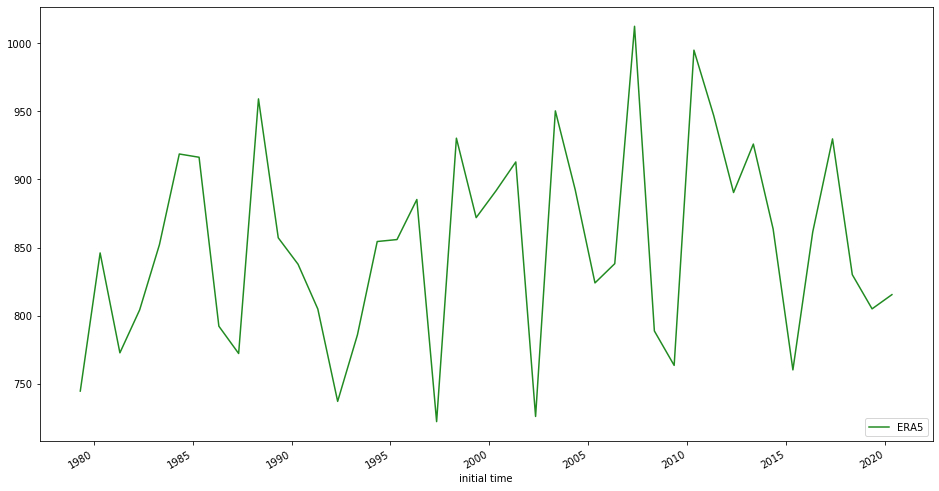

In [147]:
print("2020 prediction", final.sel(time = slice('2020-05-01', '2020-05-01')))
plt.figure(figsize=(16,8))
plt.title('1979 - 2020 predictions', fontsize = 'xx-large')
final.plot(label='ERA5', color = 'forestgreen')
plt.legend(loc='lower right')

In [144]:
# Copyright (c) 2020 Medha Palavalli.